<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix

In [3]:
# Netflix Titles data - Kaggle (URL: https://www.kaggle.com/shivamb/netflix-shows)

"""
What will we find out?

1. Trend of Genres(listed_in) in particular year?
2. Directors related to these genres?
3. Type of the title? Whether it is a movie or a TV show?

"""

'\nWhat will we find out?\n\n1. Trend of Genres(listed_in) in particular year?\n2. Directors related to these genres?\n3. Type of the title? Whether it is a movie or a TV show?\n\n'

**Import Libraries**

In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

**Original dataset**

In [5]:
netflixData = pd.read_csv("/content/drive/MyDrive/Google Colab Data /netflix_titles.csv")
netflixData

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


**All Listed years** 

In [6]:
year_of_release = list(set(netflixData["release_year"]))
# type(year_of_release)
# year_of_release

**Genre Trend according to year**

In [7]:
# Trend of Genres in particular year.
# year to movie names dictionary.

year_to_movie_dict = {}

for years in year_of_release:
  titles = netflixData.loc[netflixData['release_year'] == years, 'title']

  if years not in year_to_movie_dict:
    year_to_movie_dict[years] = titles

In [8]:
year_to_movie_dict

year_to_movie_df = {}
for key, value in year_to_movie_dict.items():
  year_to_movie_df["Movie"] = year_to_movie_dict

**Movies and TV shows that released in a particular year**

In [9]:
netflixDFOne = pd.DataFrame(year_to_movie_df)
# netflixDFOne

In [10]:
number_of_rows = len(netflixDFOne.index)
# number_of_rows

In [11]:
netflixDFTwo = pd.DataFrame([netflixDFOne.index, netflixDFOne.Movie]).transpose()
netflixDFTwo.rename(columns={0:'Years', 1:'Movies'}, inplace=True)
# netflixDFTwo

**Movies from 2020**

In [12]:
print(list(netflixDFTwo.loc[ netflixDFTwo['Years'] == 2019, 'Movies'  ]))

[0       Norm of the North: King Sized Adventure
34                   Archibald's Next Big Thing
35                                   Article 15
38                          Kill Me If You Dare
39                                      The Spy
                         ...                   
6198                              The Protector
6204                                     Cuckoo
6206                                  Samantha!
6215                        Crazy Ex-Girlfriend
6219                         Pokémon the Series
Name: title, Length: 843, dtype: object]


**Table provides all movies along with their Genres**

In [13]:
# Adding the genres to the movies
movieTitles = list(netflixData['title'])

# dictionary contaning movie titles
title_dict = {}

for movies in movieTitles:
  mTitlesGenres = netflixData.loc[ netflixData['title']  == movies, 'listed_in']

  if movies not in title_dict:
    title_dict[movies] = mTitlesGenres

In [14]:
mTitlesGenres_df = {}

for key, value in title_dict.items():
  mTitlesGenres_df['Genres'] = title_dict



In [15]:
genresDF = pd.DataFrame(mTitlesGenres_df)
# genresDF

**DATAFRAME - DICTIONARY: Movies: Genres**

In [16]:
MovieTitles = pd.Series(netflixData.title)
MovieGenres = pd.Series(netflixData.listed_in)

DFOneNetflix = pd.DataFrame(MovieTitles)
DFOneNetflix['Genres'] = pd.DataFrame(MovieGenres)
DFTwoNetflix = DFOneNetflix
# print(DFTwoNetflix)

# converts DataFrame to Dict w/o index - all records
dFtoDict = DFTwoNetflix.set_index('title')['Genres'].to_dict()
# print(dFtoDict)
# print(type(dFtoDict))

**Cross checking the movies by year with their genres**

In [17]:
to_match_list = list(netflixDFTwo.loc[ netflixDFTwo['Years'] == 2018, 'Movies'  ])
matchList = to_match_list[:]
# matchList = [movieNames.str.lower() for movieNames in to_match_list[:]]
# print(matchList)
print(len(dFtoDict))

# movieList = []

# function to make raw strings to match movie names.
# def toRE(testList):
# 	for i in testList:
# 		movieList.append("r'\b" + i + "\b'")

# toRE(dFtoDict.keys())
# print(movieList)




6172


**Matching the movie names by year and finding their Genres.**

In [18]:
for index, movieNames in enumerate(matchList):
  movieGenDict = { keys:values for keys, values in dFtoDict.items()  if keys in str(movieNames)}
  # print(movieGenDict)
movieGenDict


{'21': 'Dramas',
 '9': 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
 'Anthony Bourdain: Parts Unknown': 'Docuseries',
 'Ash vs. Evil Dead': 'TV Action & Adventure, TV Comedies, TV Horror',
 'BAKI': 'Anime Series, International TV Shows',
 'City of Joy': 'Documentaries',
 'First and Last': 'Docuseries',
 'Joy': 'Dramas, Independent Movies, International Movies',
 'K': 'Anime Series, Crime TV Shows, International TV Shows',
 'Last': 'Crime TV Shows, International TV Shows, Korean TV Shows',
 'Next': 'Action & Adventure, Sci-Fi & Fantasy',
 'Next Gen': 'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
 'P': 'Horror Movies, International Movies',
 'Señora Acero': 'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
 'Sierra Burgess Is A Loser': 'Comedies, Romantic Movies',
 'The Magic School Bus': "Kids' TV",
 'The Magic School Bus Rides Again': "Kids' TV",
 'The Most Assassinated Woman in the World': 'Dramas, International Movies, Thrillers'}

**PIE CHART: Genres**

In [106]:
# Most popular genres.

list_of_genres = list(Counter(dFtoDict.values()))
print(type(list_of_genres))

# Counter for genres
genresCounter = {}
counter = 0

for genres in list_of_genres:
  if genres in dFtoDict.values():
    counter +=1
    # print(genres += 1)
    genresCounter[genres] = counter

# genresCounter
# print(max(genresCounter.values()))

listingGenres = list(genresCounter.values())
listingGenresSorted = sorted( listingGenres, reverse=True)
max_genres_Popular = listingGenresSorted[:5]

<class 'list'>


In [130]:
labels = []
sizes = []

for max_genres in max_genres_Popular:
  mGenre = str(max_genres)
  # print(mGenre)
  for genre, counter in genresCounter.items():
    if mGenre in str(counter):
      print(genre, mGenre)
      labels.append(genre)
      sizes.append(mGenre)


Reality TV, Spanish-Language TV Shows 458
TV Comedies, TV Dramas, TV Horror 457
Romantic TV Shows, TV Action & Adventure, TV Dramas 456
British TV Shows, TV Comedies, TV Dramas 455
Classic & Cult TV, Kids' TV, TV Comedies 454


<function matplotlib.pyplot.show>

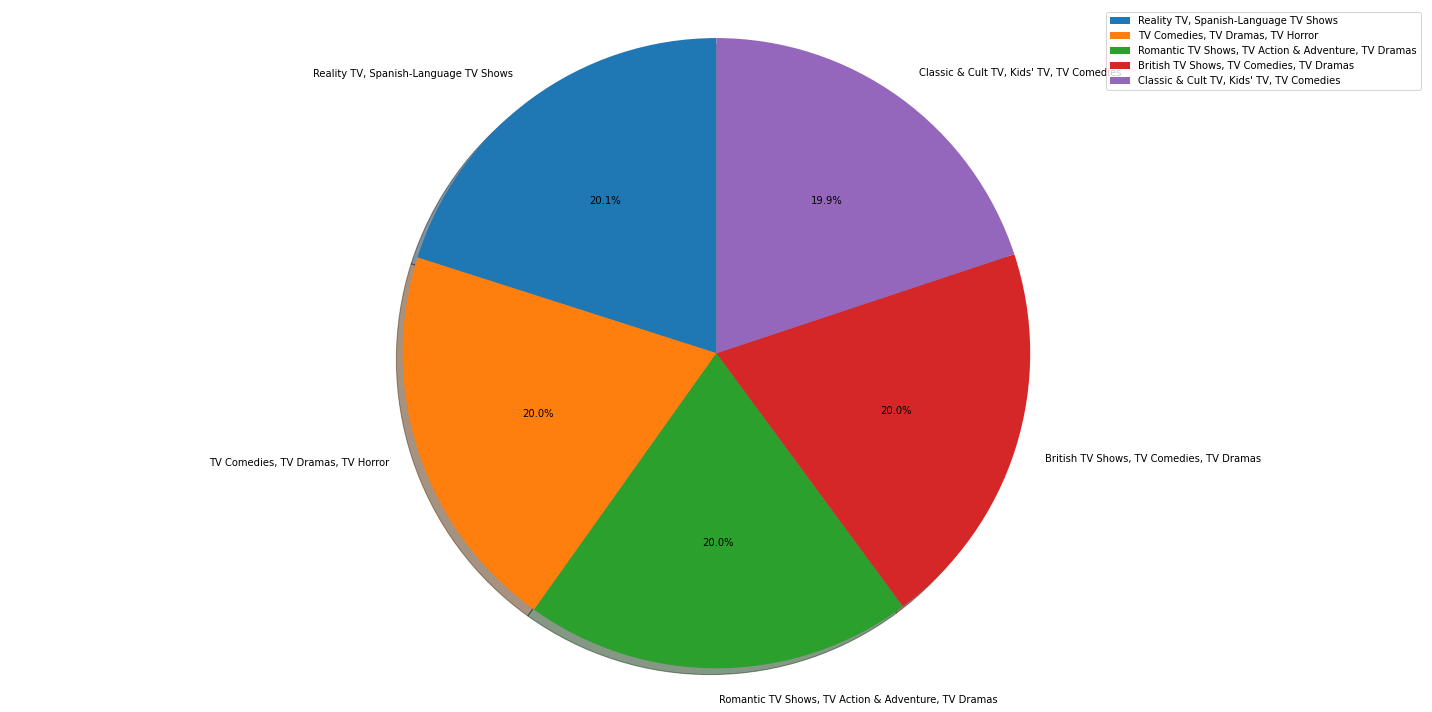

In [140]:
# The PIE CHART of popular genres:
# Carrying the list: labels and sizes from the above cell.
# explode = (0.1, 0, 0, 0)

plt.figure(figsize=(20,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()


plt.show